# Column Descriptions for the data #

## 1. ID
* Description: A unique numeric identifier assigned to each employee.
* Data Type: Integer
* Example: 1, 2, 3, 4, 5

## 2. Gender
* Description: The gender of the employee.
* Data Type: Categorical (String)
* Possible Values: 'M' (Male), 'F' (Female)
* Example: 'M', 'F'

## 3. Experience (Years)
* Description: The number of years the employee has been working in their field.
* Data Type: Integer
* Range: 0 to 20 years (in this dataset)
* Example: 5, 10, 7, 15, 2

## 4. Position
* Description: The job title or role of the employee within the organization.
* Data Type: Categorical (String)
* Possible Values: 'IT Manager', 'Software Engineer', 'Network Administrator', 'Systems Administrator', 'Database Administrator (DBA)', 'Web Developer', 'IT Support Specialist', 'Systems Analyst', 'IT Security Analyst', 'DevOps Engineer', 'Cloud Solutions Architect'
* Example: 'Software Engineer', 'IT Manager', 'Web Developer'

## 5. Salary
* Description: The annual salary of the employee in USD.
* Data Type: Integer (representing salary in USD)
* Range: 40,000 to 150,000 (in this dataset)
* Example: 84,000, 135,000, 60,000

# Load the Dataset

In [3]:
import pandas as pd

data = pd.read_csv('employee_data.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [4]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397


# Basic Statistics

In [5]:
print("\nBasic statistics of the dataset:")
print(data.describe(include='all'))


Basic statistics of the dataset:
                ID Gender  Experience (Years)       Position        Salary
count   400.000000    400          400.000000            400     400.00000
unique         NaN      2                 NaN             11           NaN
top            NaN      M                 NaN  Web Developer           NaN
freq           NaN    202                 NaN             43           NaN
mean    200.500000    NaN            9.670000            NaN  131701.19750
std     115.614301    NaN            6.101571            NaN   43351.50899
min       1.000000    NaN            0.000000            NaN   43643.00000
25%     100.750000    NaN            4.000000            NaN  100484.75000
50%     200.500000    NaN           10.000000            NaN  128561.50000
75%     300.250000    NaN           15.000000            NaN  157735.00000
max     400.000000    NaN           20.000000            NaN  269950.00000


In [6]:
position_counts = data['Position'].value_counts()
print("\nNumber of employees by position:")
print(position_counts)


Number of employees by position:
Position
Web Developer                   43
IT Manager                      40
IT Security Analyst             39
Systems Administrator           38
Database Administrator (DBA)    38
DevOps Engineer                 37
Systems Analyst                 37
Software Engineer               36
Network Administrator           31
IT Support Specialist           31
Cloud Solutions Architect       30
Name: count, dtype: int64


# Data Analysis

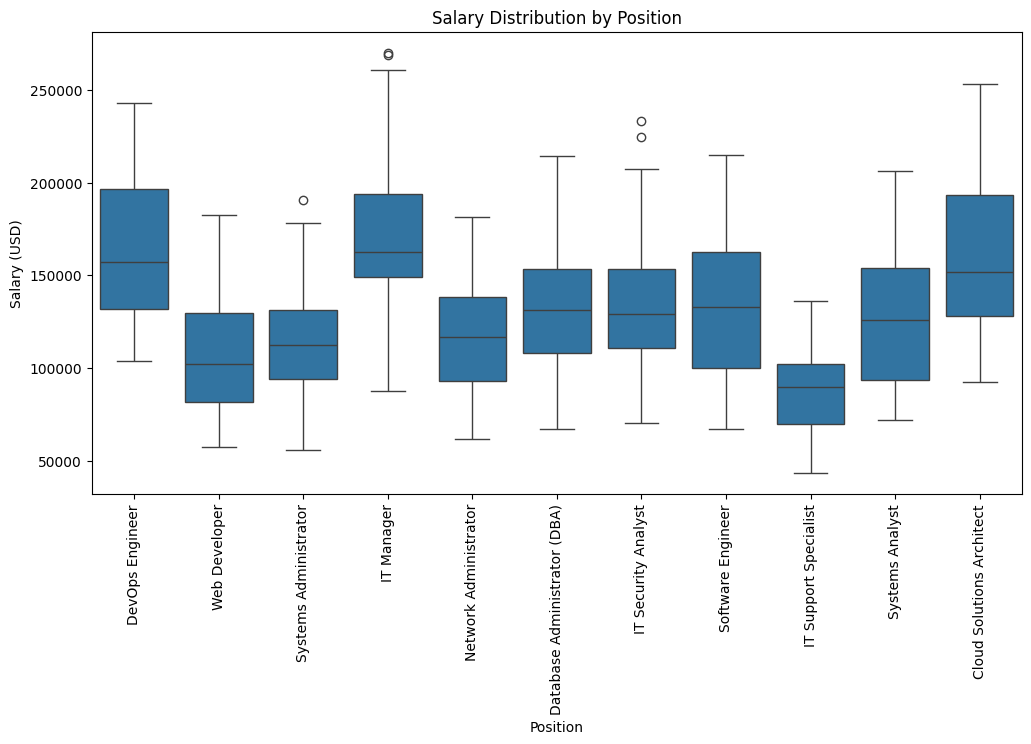

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Salary distribution by position
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Position', y='Salary')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary (USD)')
plt.show()

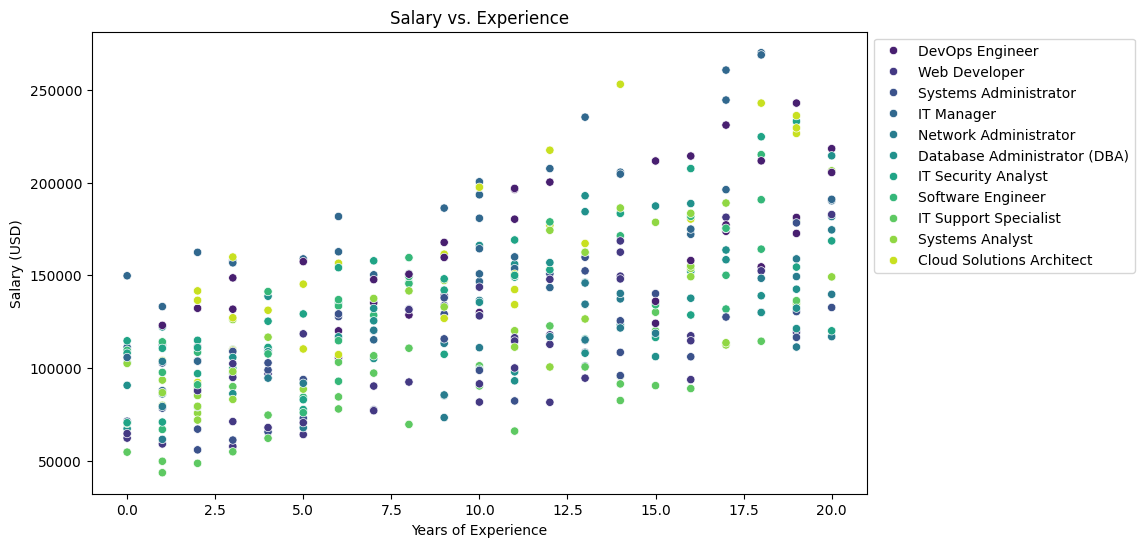

In [8]:
# Average salary by experience
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Experience (Years)', y='Salary', hue='Position', palette='viridis')
plt.title('Salary vs. Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [9]:
# Gender distribution
gender_counts = data['Gender'].value_counts()
print("\nGender distribution:")
print(gender_counts)


Gender distribution:
Gender
M    202
F    198
Name: count, dtype: int64


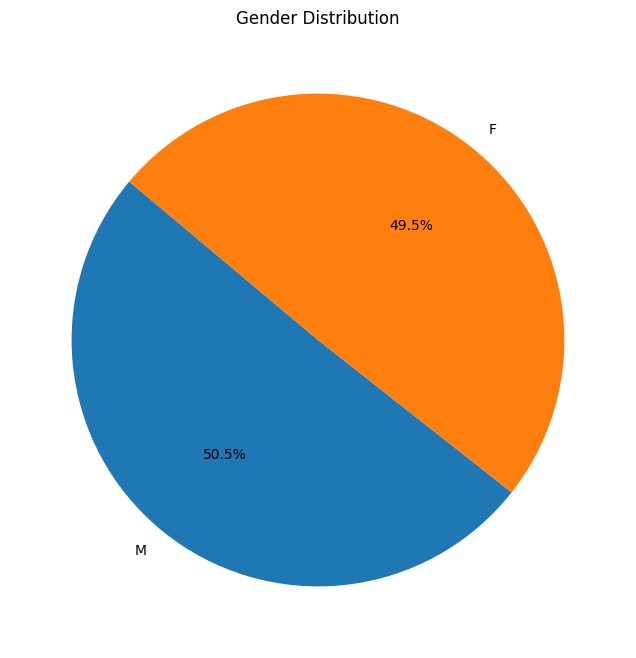

In [10]:
# Pie chart for gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

In [11]:
data

ID Gender  Experience (Years)                      Position  Salary
0      1      F                   4               DevOps Engineer  109976
1      2      M                   6               DevOps Engineer  120088
2      3      M                  17                 Web Developer  181301
3      4      M                   7         Systems Administrator   77530
4      5      F                  13         Systems Administrator  152397
..   ...    ...                 ...                           ...     ...
395  396      F                  19     Cloud Solutions Architect  236045
396  397      F                  20                 Web Developer  182770
397  398      F                   9         Network Administrator   85550
398  399      M                  18  Database Administrator (DBA)  129996
399  400      F                  11           IT Security Analyst  169058

[400 rows x 5 columns]

# Machine Learning Model

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Position'] = label_encoder.fit_transform(data['Position'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [13]:
data

ID  Gender  Experience (Years)  Position  Salary
0      1       0                   4         2  109976
1      2       1                   6         2  120088
2      3       1                  17        10  181301
3      4       1                   7         8   77530
4      5       0                  13         8  152397
..   ...     ...                 ...       ...     ...
395  396       0                  19         0  236045
396  397       0                  20        10  182770
397  398       0                   9         6   85550
398  399       1                  18         1  129996
399  400       0                  11         4  169058

[400 rows x 5 columns]

In [14]:
x = data.iloc[:,1:4]
x

Gender  Experience (Years)  Position
0         0                   4         2
1         1                   6         2
2         1                  17        10
3         1                   7         8
4         0                  13         8
..      ...                 ...       ...
395       0                  19         0
396       0                  20        10
397       0                   9         6
398       1                  18         1
399       0                  11         4

[400 rows x 3 columns]

In [15]:
y = data.iloc[:,-1]
y

0      109976
1      120088
2      181301
3       77530
4      152397
        ...  
395    236045
396    182770
397     85550
398    129996
399    169058
Name: Salary, Length: 400, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
len(x_train)

320

In [18]:
len(x_test)

80

In [19]:
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier(n_estimators=100,random_state=1)
Model.fit(x,y)

RandomForestClassifier(random_state=1)

In [20]:
y_pred = Model.predict(x_test)

In [21]:
Model.score(x_test,y_test)

0.7375

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

345810790.7625

# Visualize the Results of Your Predictions

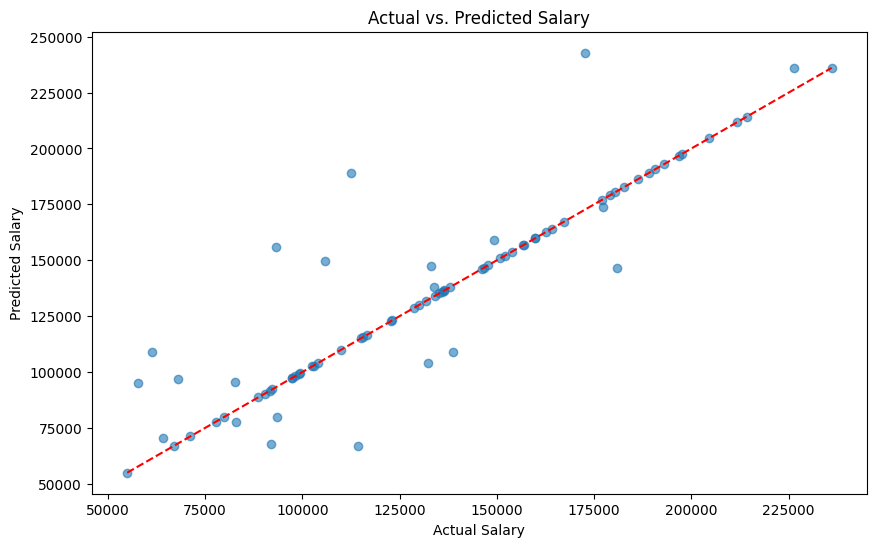

In [23]:
# Plot Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

345810790.7625

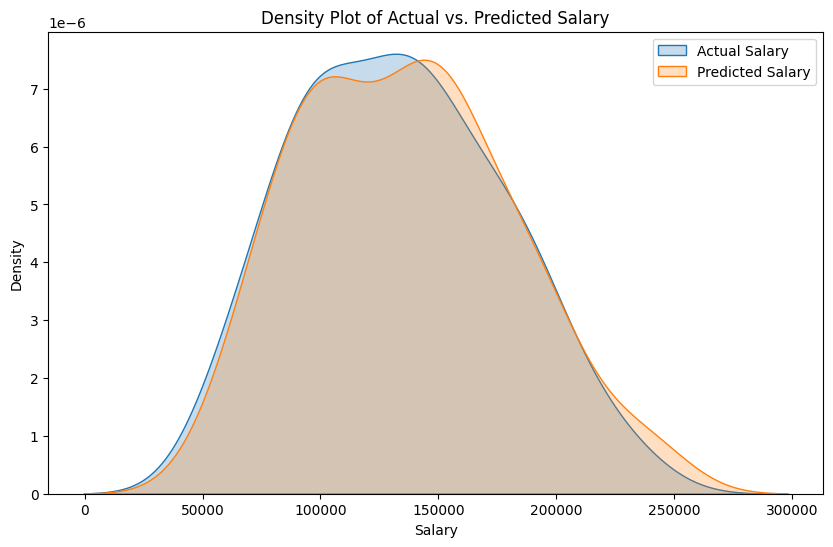

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Salary', fill=True)
sns.kdeplot(y_pred, label='Predicted Salary', fill=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs. Predicted Salary')
plt.legend()
plt.show()

# Summary

## Data Preparation:
* Loading Data: Use pandas to load your dataset from a CSV file. Feature Engineering: Convert categorical variables into dummy variables. Handling Infinite Values: Replace inf and -inf with NaN and drop those rows to avoid issues with future versions of seaborn.

## Model Training and Prediction:
* Splitting Data: Use train_test_split to divide the data into training and testing sets. Training Model: Fit a machine learning model (e.g., Random Forest Regressor) to the training data. Making Predictions: Use the trained model to predict values on the test data.

## Evaluation:
* Metrics: Calculate performance metrics such as Mean Squared Error (MSE) and R-squared (R²) to evaluate model performance. Visualization:
* Density Plot: Use seaborn to create a density plot comparing the distribution of actual and predicted salaries. Ensure to use fill=True to avoid deprecation warnings.